# CIA-3 Computer Vision Assignment
**Student ID: 2447218**

---

## Program-1: Medical Imaging - X-ray Analysis (CO-2)

### Context:
The given X-ray image shows primary lung adenocarcinoma. The task is to detect specific patterns (e.g., tumors or fractures) by applying image processing techniques using edge-detection kernels.


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Set matplotlib to display larger images
plt.rcParams['figure.figsize'] = (15, 10)


Image loaded successfully. Shape: (2503, 3028)


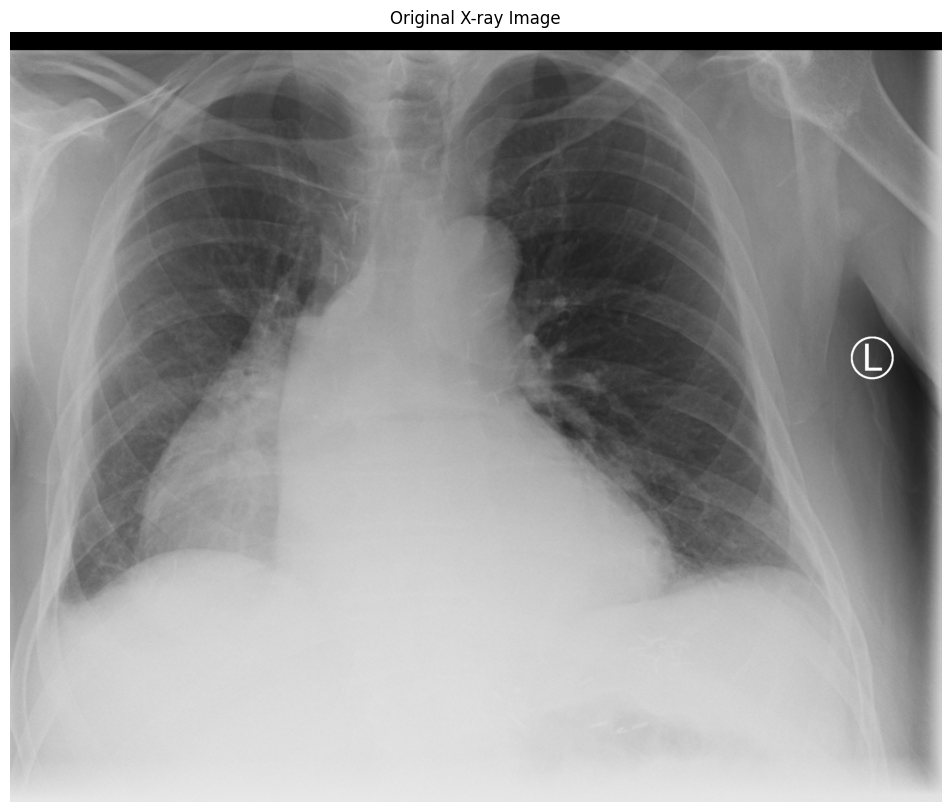

In [29]:
# Load the X-ray image
img = cv2.imread('Set-2-Program-1-Conv.jpeg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print(f"Image loaded successfully. Shape: {img.shape}")
    plt.imshow(img, cmap='gray')
    plt.title('Original X-ray Image')
    plt.axis('off')
    plt.show()


### Define Edge Detection Masks

Three different masks for edge detection and enhancement:


In [30]:
# Mask 1: Sobel X (Horizontal edge detection)
mask1 = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]], dtype=np.float32)

# Mask 2: Sobel Y (Vertical edge detection)
mask2 = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]], dtype=np.float32)

# Mask 3: Prewitt edge detection
mask3 = np.array([[-1, -1, -1],
                  [0, 0, 0],
                  [1, 1, 1]], dtype=np.float32)

print("Mask 1 - Sobel X (Horizontal edges):")
print(mask1)
print("\nMask 2 - Sobel Y (Vertical edges):")
print(mask2)
print("\nMask 3 - Prewitt Edge Detection:")
print(mask3)


Mask 1 - Sobel X (Horizontal edges):
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

Mask 2 - Sobel Y (Vertical edges):
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]

Mask 3 - Prewitt Edge Detection:
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


### Q1: Implement Correlation Operation

**How does the kernel interact with the image pixels?**

In correlation, the kernel slides over the image and at each position:
1. The kernel is placed directly on top of the image region
2. Corresponding elements are multiplied
3. All products are summed to give the output pixel value

Formula: `Output(i,j) = Σ Σ Image(i+m, j+n) × Kernel(m, n)`


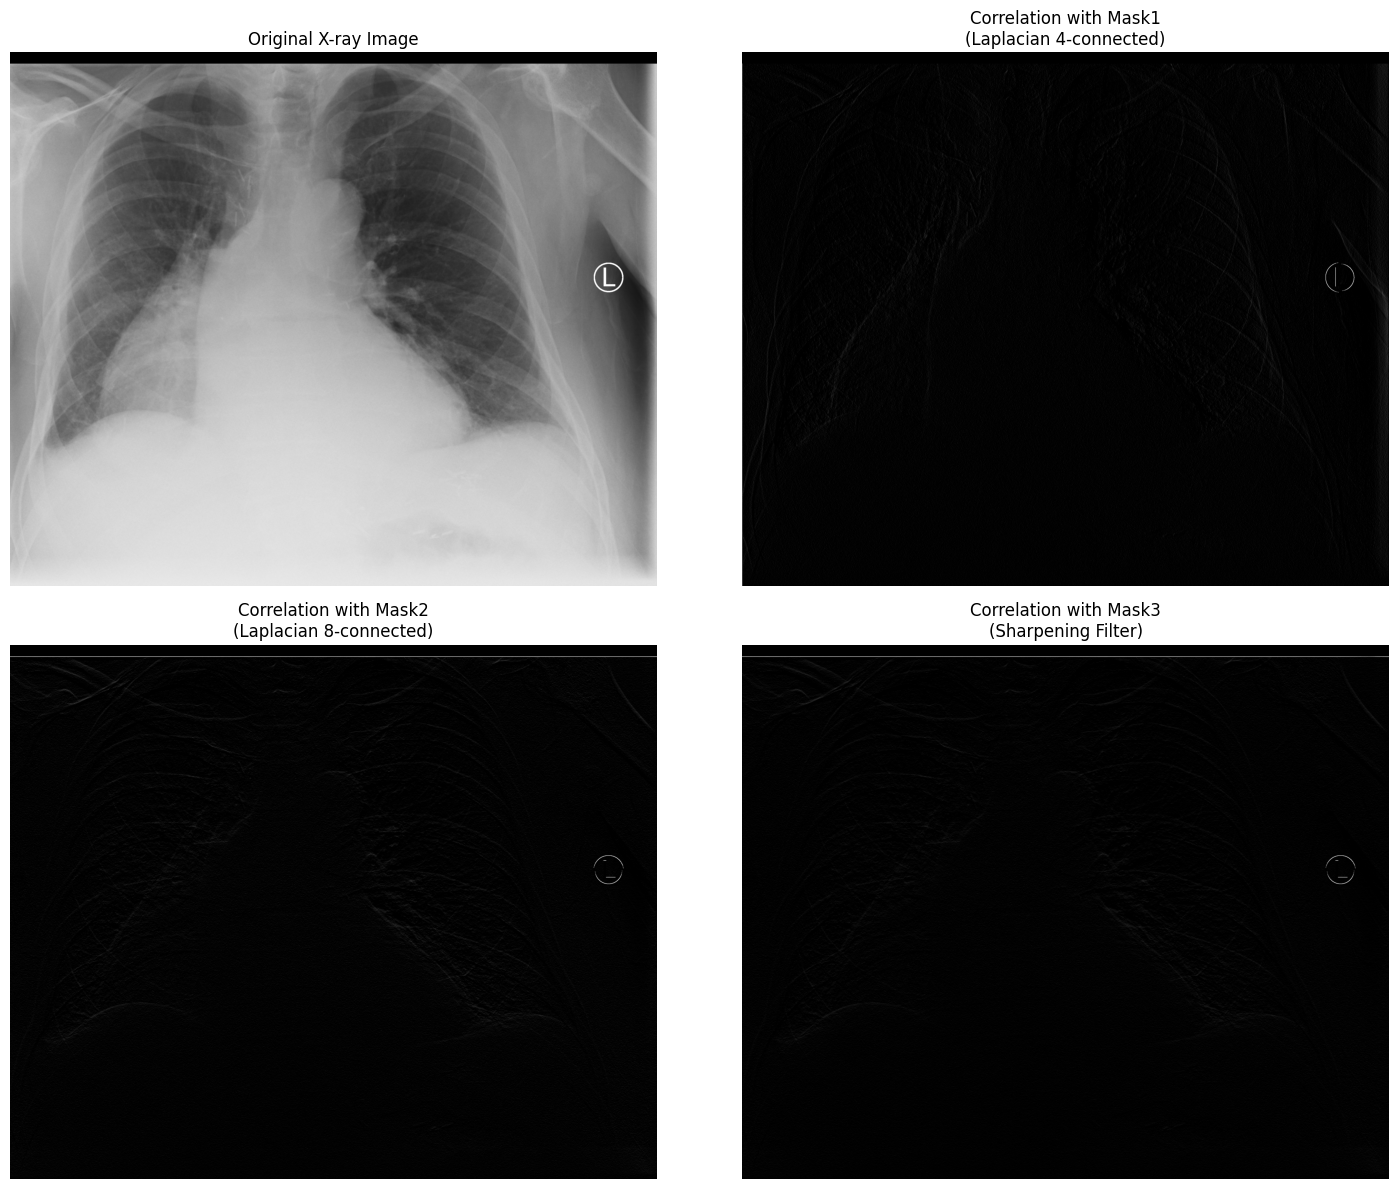

Correlation operation completed successfully!


In [31]:
# User-defined correlation function
def correlation(img, kernel):
    """
    Applies correlation operation between image and kernel.
    Kernel is placed directly on the image without flipping.
    """
    k = kernel.shape[0] // 2
    padded = np.pad(img, ((k, k), (k, k)), mode='constant', constant_values=0)
    output = np.zeros_like(img, dtype=np.float32)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)
    
    return output

# Apply correlation with all three masks
corr1 = correlation(img, mask1)
corr2 = correlation(img, mask2)
corr3 = correlation(img, mask3)

# Normalize for display
corr1_display = np.clip(corr1, 0, 255).astype(np.uint8)
corr2_display = np.clip(corr2, 0, 255).astype(np.uint8)
corr3_display = np.clip(corr3, 0, 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original X-ray Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(corr1_display, cmap='gray')
axes[0, 1].set_title('Correlation with Mask1\n(Laplacian 4-connected)', fontsize=12)
axes[0, 1].axis('off')

axes[1, 0].imshow(corr2_display, cmap='gray')
axes[1, 0].set_title('Correlation with Mask2\n(Laplacian 8-connected)', fontsize=12)
axes[1, 0].axis('off')

axes[1, 1].imshow(corr3_display, cmap='gray')
axes[1, 1].set_title('Correlation with Mask3\n(Sharpening Filter)', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Correlation operation completed successfully!")


### Q2: Apply Convolution Operation



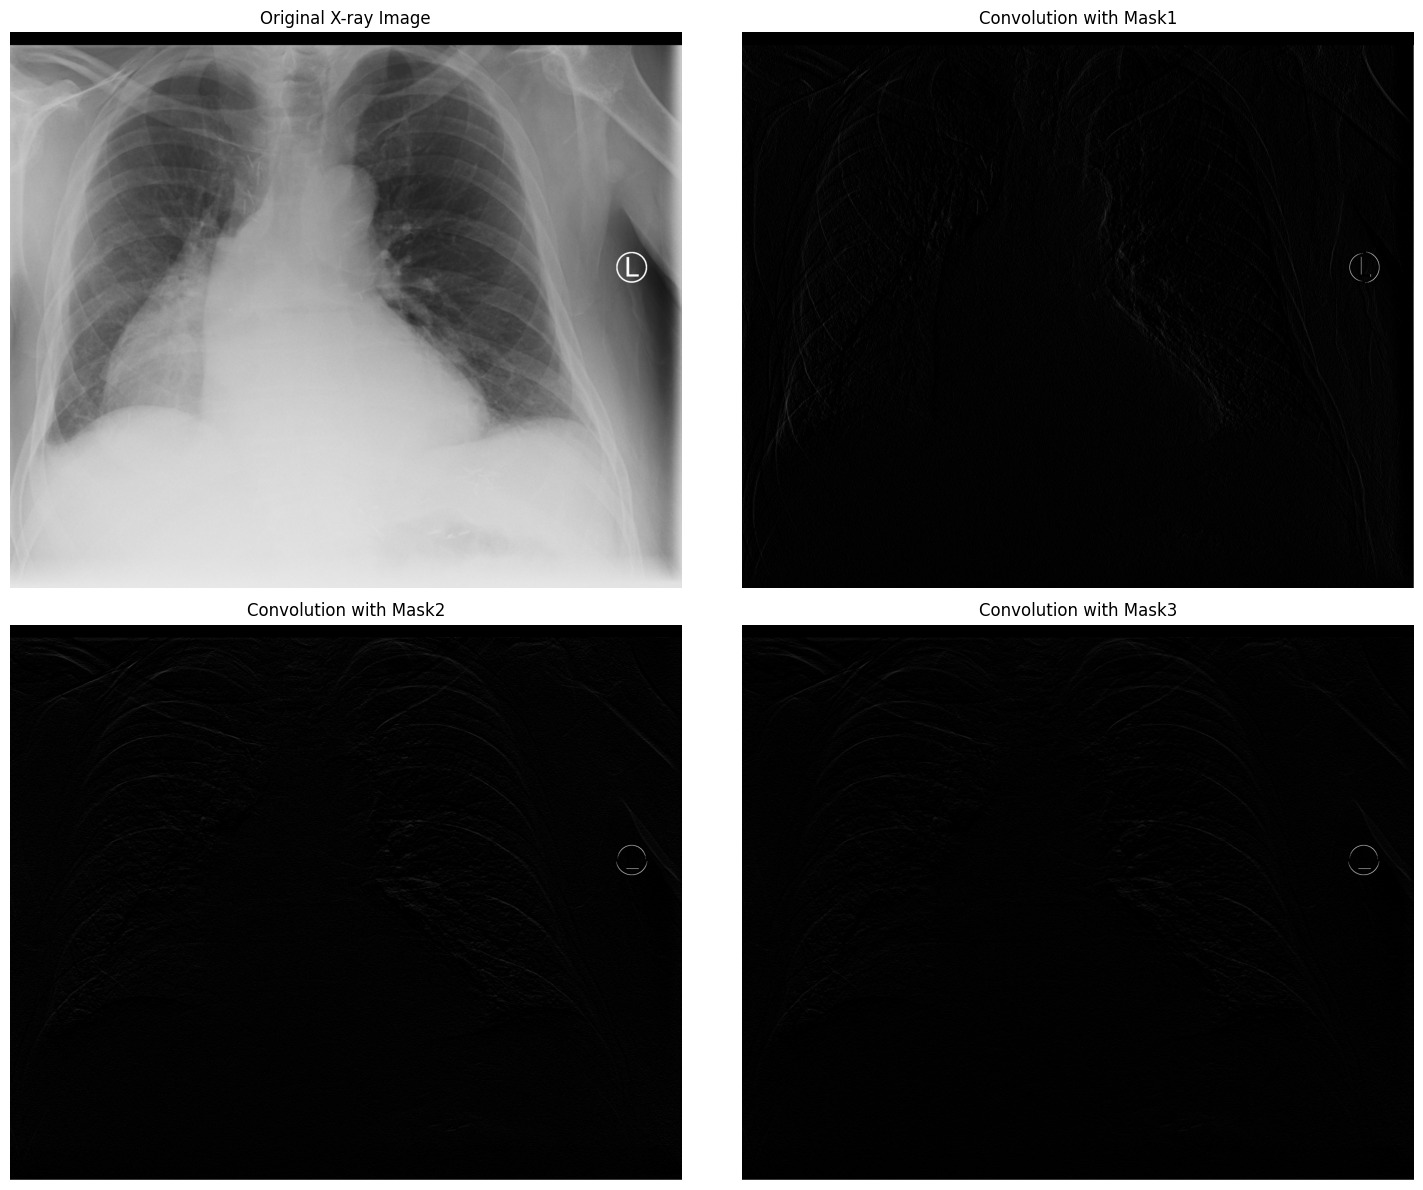

Convolution operation completed successfully!


In [32]:
# User-defined convolution function
def convolution(img, kernel):
    """
    Applies convolution operation between image and kernel.
    Kernel is flipped 180 degrees before applying correlation.
    """
    flipped_kernel = np.flipud(np.fliplr(kernel))  # Flip 180°
    return correlation(img, flipped_kernel)

# Apply convolution with all three masks
conv1 = convolution(img, mask1)
conv2 = convolution(img, mask2)
conv3 = convolution(img, mask3)

# Normalize for display
conv1_display = np.clip(conv1, 0, 255).astype(np.uint8)
conv2_display = np.clip(conv2, 0, 255).astype(np.uint8)
conv3_display = np.clip(conv3, 0, 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original X-ray Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(conv1_display, cmap='gray')
axes[0, 1].set_title('Convolution with Mask1', fontsize=12)
axes[0, 1].axis('off')

axes[1, 0].imshow(conv2_display, cmap='gray')
axes[1, 0].set_title('Convolution with Mask2', fontsize=12)
axes[1, 0].axis('off')

axes[1, 1].imshow(conv3_display, cmap='gray')
axes[1, 1].set_title('Convolution with Mask3', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Convolution operation completed successfully!")


### Q3: Demonstrate How Correlation Differs from Convolution

**Template Matching Demonstration**

Key differences:
- **Correlation**: Used for template matching - finds where a template appears in the image
- **Convolution**: Used for filtering - applies transformations like blurring, sharpening, edge detection

Let's demonstrate with an asymmetric kernel to see the difference:


Asymmetric Kernel (Sobel Horizontal):
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]

Flipped Kernel (for convolution):
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


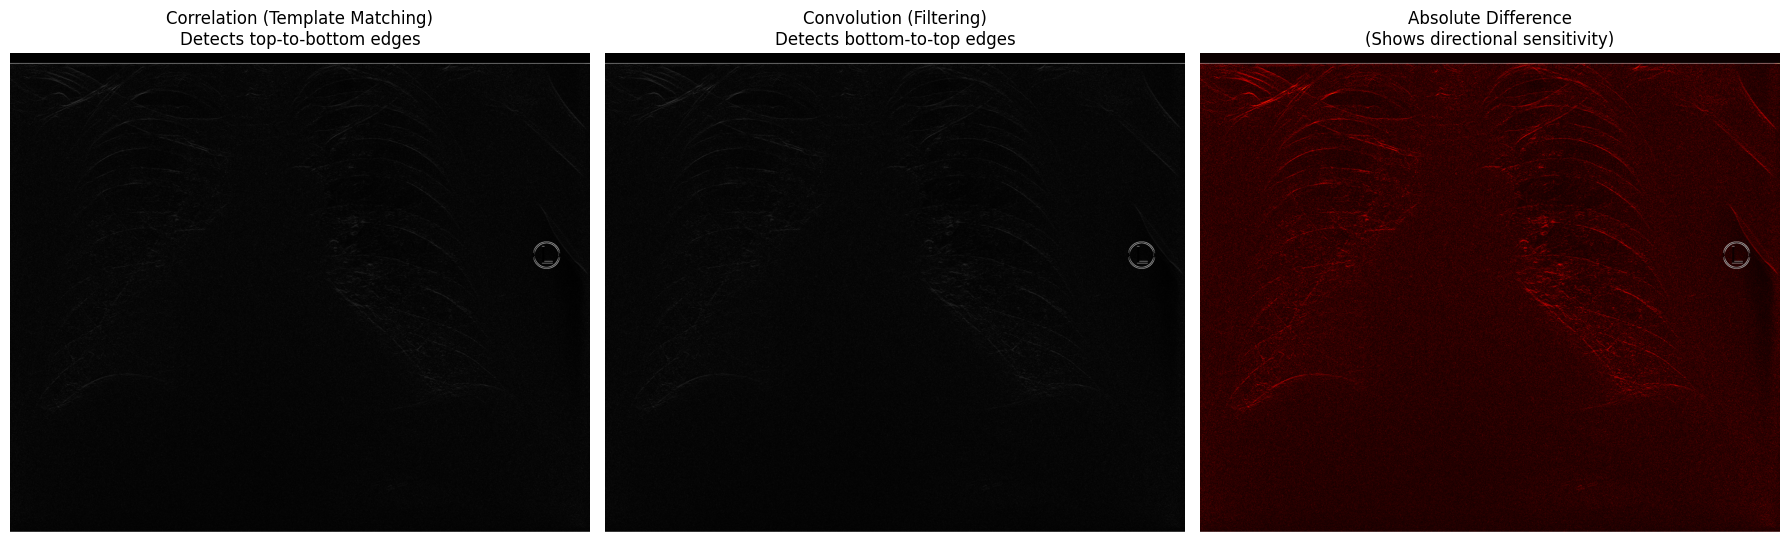


=== EXPLANATION ===
For template matching (detecting specific patterns):
- CORRELATION is preferred: directly matches template orientation
- Detects patterns in their original orientation

For filtering (edge detection, blurring):
- CONVOLUTION is preferred: mathematically consistent
- With asymmetric kernels, convolution and correlation detect opposite edge directions


In [33]:
# Create an asymmetric kernel (Sobel-like for horizontal edges)
asymmetric_kernel = np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]], dtype=np.float32)

print("Asymmetric Kernel (Sobel Horizontal):")
print(asymmetric_kernel)
print("\nFlipped Kernel (for convolution):")
print(np.flipud(np.fliplr(asymmetric_kernel)))

# Apply both operations
corr_asymmetric = correlation(img, asymmetric_kernel)
conv_asymmetric = convolution(img, asymmetric_kernel)

# Normalize for display
corr_asymmetric_display = np.clip(np.abs(corr_asymmetric), 0, 255).astype(np.uint8)
conv_asymmetric_display = np.clip(np.abs(conv_asymmetric), 0, 255).astype(np.uint8)

# Calculate difference
difference = np.abs(corr_asymmetric - conv_asymmetric)
difference_display = np.clip(difference, 0, 255).astype(np.uint8)

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(corr_asymmetric_display, cmap='gray')
axes[0].set_title('Correlation (Template Matching)\nDetects top-to-bottom edges', fontsize=12)
axes[0].axis('off')

axes[1].imshow(conv_asymmetric_display, cmap='gray')
axes[1].set_title('Convolution (Filtering)\nDetects bottom-to-top edges', fontsize=12)
axes[1].axis('off')

axes[2].imshow(difference_display, cmap='hot')
axes[2].set_title('Absolute Difference\n(Shows directional sensitivity)', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n=== EXPLANATION ===")
print("For template matching (detecting specific patterns):")
print("- CORRELATION is preferred: directly matches template orientation")
print("- Detects patterns in their original orientation")
print("\nFor filtering (edge detection, blurring):")
print("- CONVOLUTION is preferred: mathematically consistent")
print("- With asymmetric kernels, convolution and correlation detect opposite edge directions")


### Q4 & Q5: Analysis and Decision Making

**Q4: Adjustments to improve detection accuracy if correlation output is not sharp enough:**

1. **Pre-processing**: Apply contrast enhancement (CLAHE)
2. **Stronger Kernels**: Use higher center weights
3. **Adaptive Thresholding**: Highlight significant edges
4. **Morphological Operations**: Clean up noise
5. **Multi-scale Detection**: Use different kernel sizes

**Q5: When to use Convolution vs Correlation in medical imaging:**

**Use CONVOLUTION for:**
- Edge detection (ribs, organ boundaries, bone structures)
- Image enhancement (sharpening, noise reduction)
- Feature extraction for CNN-based analysis
- Standard filters (Gaussian, Sobel, Laplacian)

**Use CORRELATION for:**
- Template matching (finding specific anatomical structures)
- Tumor detection (matching known tumor patterns)
- Tracking features across multiple frames/slices
- Pattern recognition (specific abnormalities)

**Benefits of combining both:**
- Convolution for preprocessing: enhance edges and reduce noise
- Correlation for detection: match preprocessed image against templates
- Better accuracy: convolution improves image quality for correlation
- Multi-stage pipeline: filter → enhance → detect → classify


---

## Program-2: Traffic Surveillance System (CO-2)

### Context:
Working as an image processing expert for a traffic surveillance system. Images suffer from:
1. Salt-and-pepper noise (transmission quality and sensor errors)
2. Blurry license plates (motion and environmental conditions)

Task: Enhance images using non-linear spatial filtering techniques.


Salt noise image shape: (225, 225)
Pepper noise image shape: (225, 225)
Salt & pepper noise image shape: (429, 525)


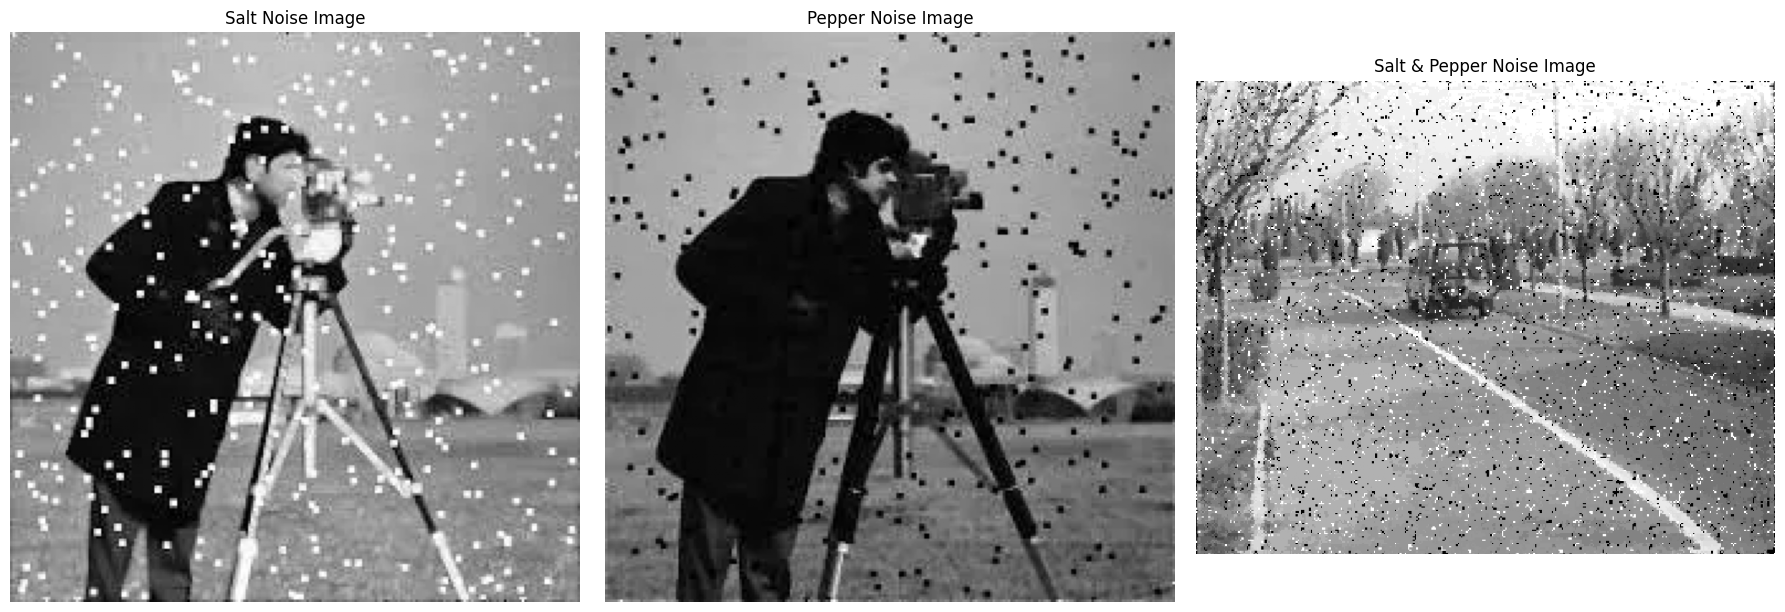

In [34]:
# Load the noisy traffic images
salt_noise_img = cv2.imread('Set-2-Program-2-saltnoise.png', cv2.IMREAD_GRAYSCALE)
pepper_noise_img = cv2.imread('Set-2-Program-2-peppernoise.png', cv2.IMREAD_GRAYSCALE)
salt_pepper_img = cv2.imread('Set-2-Program-2-Saltandpepper noise.png', cv2.IMREAD_GRAYSCALE)

# Display original noisy images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

if salt_noise_img is not None:
    axes[0].imshow(salt_noise_img, cmap='gray')
    axes[0].set_title('Salt Noise Image', fontsize=12)
    axes[0].axis('off')
    print(f"Salt noise image shape: {salt_noise_img.shape}")

if pepper_noise_img is not None:
    axes[1].imshow(pepper_noise_img, cmap='gray')
    axes[1].set_title('Pepper Noise Image', fontsize=12)
    axes[1].axis('off')
    print(f"Pepper noise image shape: {pepper_noise_img.shape}")

if salt_pepper_img is not None:
    axes[2].imshow(salt_pepper_img, cmap='gray')
    axes[2].set_title('Salt & Pepper Noise Image', fontsize=12)
    axes[2].axis('off')
    print(f"Salt & pepper noise image shape: {salt_pepper_img.shape}")

plt.tight_layout()
plt.show()


### Define Non-linear Spatial Filters

Implementing both user-defined and built-in versions:


In [35]:
# ========== USER-DEFINED FUNCTIONS ==========

def min_filter_manual(img, ksize):
    """
    User-defined Min filter - replaces each pixel with minimum in neighborhood.
    Best for SALT noise removal (removes white pixels).
    """
    k = ksize // 2
    padded = np.pad(img, ((k, k), (k, k)), mode='edge')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.min(region)
    
    return output

def max_filter_manual(img, ksize):
    """
    User-defined Max filter - replaces each pixel with maximum in neighborhood.
    Best for PEPPER noise removal (removes black pixels).
    """
    k = ksize // 2
    padded = np.pad(img, ((k, k), (k, k)), mode='edge')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.max(region)
    
    return output

def median_filter_manual(img, ksize):
    """
    User-defined Median filter - replaces each pixel with median in neighborhood.
    Best for SALT & PEPPER noise removal (handles both extremes).
    """
    k = ksize // 2
    padded = np.pad(img, ((k, k), (k, k)), mode='edge')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.median(region)
    
    return output

def midpoint_filter_manual(img, ksize):
    """
    User-defined Midpoint filter - average of max and min in neighborhood.
    Best for GAUSSIAN noise removal.
    Formula: Midpoint = (I_max + I_min) / 2
    """
    k = ksize // 2
    padded = np.pad(img, ((k, k), (k, k)), mode='edge')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = (np.max(region) + np.min(region)) // 2
    
    return output

# ========== BUILT-IN FUNCTIONS ==========

def min_filter_builtin(img, ksize):
    """Built-in Min filter using scipy"""
    return ndimage.minimum_filter(img, size=ksize)

def max_filter_builtin(img, ksize):
    """Built-in Max filter using scipy"""
    return ndimage.maximum_filter(img, size=ksize)

def median_filter_builtin(img, ksize):
    """Built-in Median filter using OpenCV"""
    return cv2.medianBlur(img, ksize)

def midpoint_filter_builtin(img, ksize):
    """Built-in Midpoint filter using scipy filters"""
    min_filtered = ndimage.minimum_filter(img, size=ksize)
    max_filtered = ndimage.maximum_filter(img, size=ksize)
    return ((min_filtered.astype(np.float32) + max_filtered.astype(np.float32)) / 2).astype(np.uint8)

print("All filter functions defined successfully!")


All filter functions defined successfully!


### Q1: Remove Salt Noise (White Pixels)

**Best filter: MIN FILTER**

**Why it's better than linear filters:**
- Salt noise adds bright (white) pixels with value 255
- Min filter replaces each pixel with the minimum in its neighborhood
- This effectively removes white spikes while preserving darker features
- Linear filters (like mean) would blur the noise across the image rather than removing it


Applying Min Filter for Salt Noise Removal...


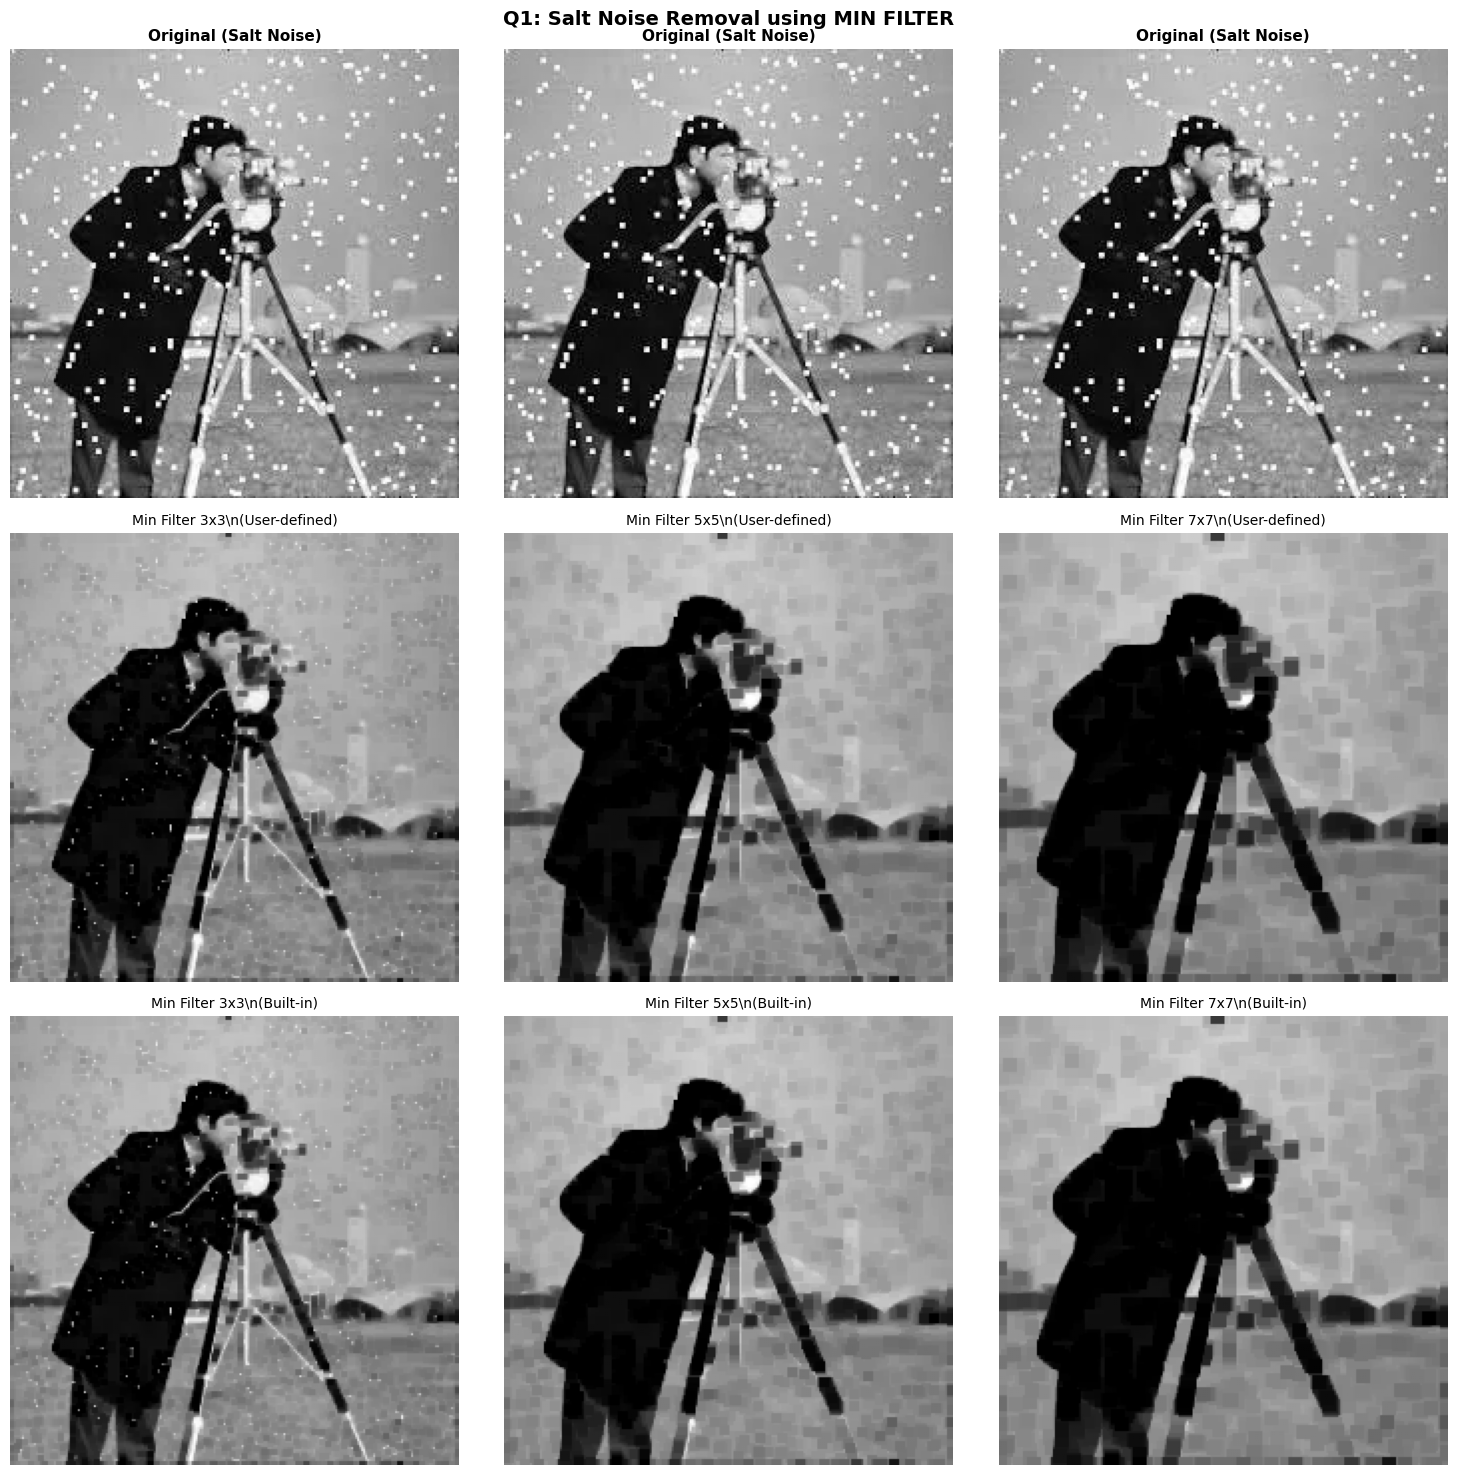

Min filter removes white salt noise effectively!


In [36]:
if salt_noise_img is not None:
    # Apply min filter with different kernel sizes (both manual and built-in)
    print("Applying Min Filter for Salt Noise Removal...")
    
    # User-defined
    min3_manual = min_filter_manual(salt_noise_img, 3)
    min5_manual = min_filter_manual(salt_noise_img, 5)
    min7_manual = min_filter_manual(salt_noise_img, 7)
    
    # Built-in
    min3_builtin = min_filter_builtin(salt_noise_img, 3)
    min5_builtin = min_filter_builtin(salt_noise_img, 5)
    min7_builtin = min_filter_builtin(salt_noise_img, 7)
    
    # Display results
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i in range(3):
        axes[0, i].imshow(salt_noise_img, cmap='gray')
        axes[0, i].set_title('Original (Salt Noise)', fontsize=11, fontweight='bold')
        axes[0, i].axis('off')
    
    axes[1, 0].imshow(min3_manual, cmap='gray')
    axes[1, 0].set_title('Min Filter 3x3\\n(User-defined)', fontsize=10)
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(min5_manual, cmap='gray')
    axes[1, 1].set_title('Min Filter 5x5\\n(User-defined)', fontsize=10)
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(min7_manual, cmap='gray')
    axes[1, 2].set_title('Min Filter 7x7\\n(User-defined)', fontsize=10)
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(min3_builtin, cmap='gray')
    axes[2, 0].set_title('Min Filter 3x3\\n(Built-in)', fontsize=10)
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(min5_builtin, cmap='gray')
    axes[2, 1].set_title('Min Filter 5x5\\n(Built-in)', fontsize=10)
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(min7_builtin, cmap='gray')
    axes[2, 2].set_title('Min Filter 7x7\\n(Built-in)', fontsize=10)
    axes[2, 2].axis('off')
    
    plt.suptitle('Q1: Salt Noise Removal using MIN FILTER', fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("Min filter removes white salt noise effectively!")
else:
    print("Salt noise image not found!")


### Q2: Remove Pepper Noise (Black Pixels)

**Best filter: MAX FILTER**

**Why it's better than linear filters:**
- Pepper noise adds dark (black) pixels with value 0
- Max filter replaces each pixel with the maximum in its neighborhood
- This effectively removes black spikes while preserving brighter features
- Linear filters would average black pixels with neighbors, creating dark halos


Applying Max Filter for Pepper Noise Removal...


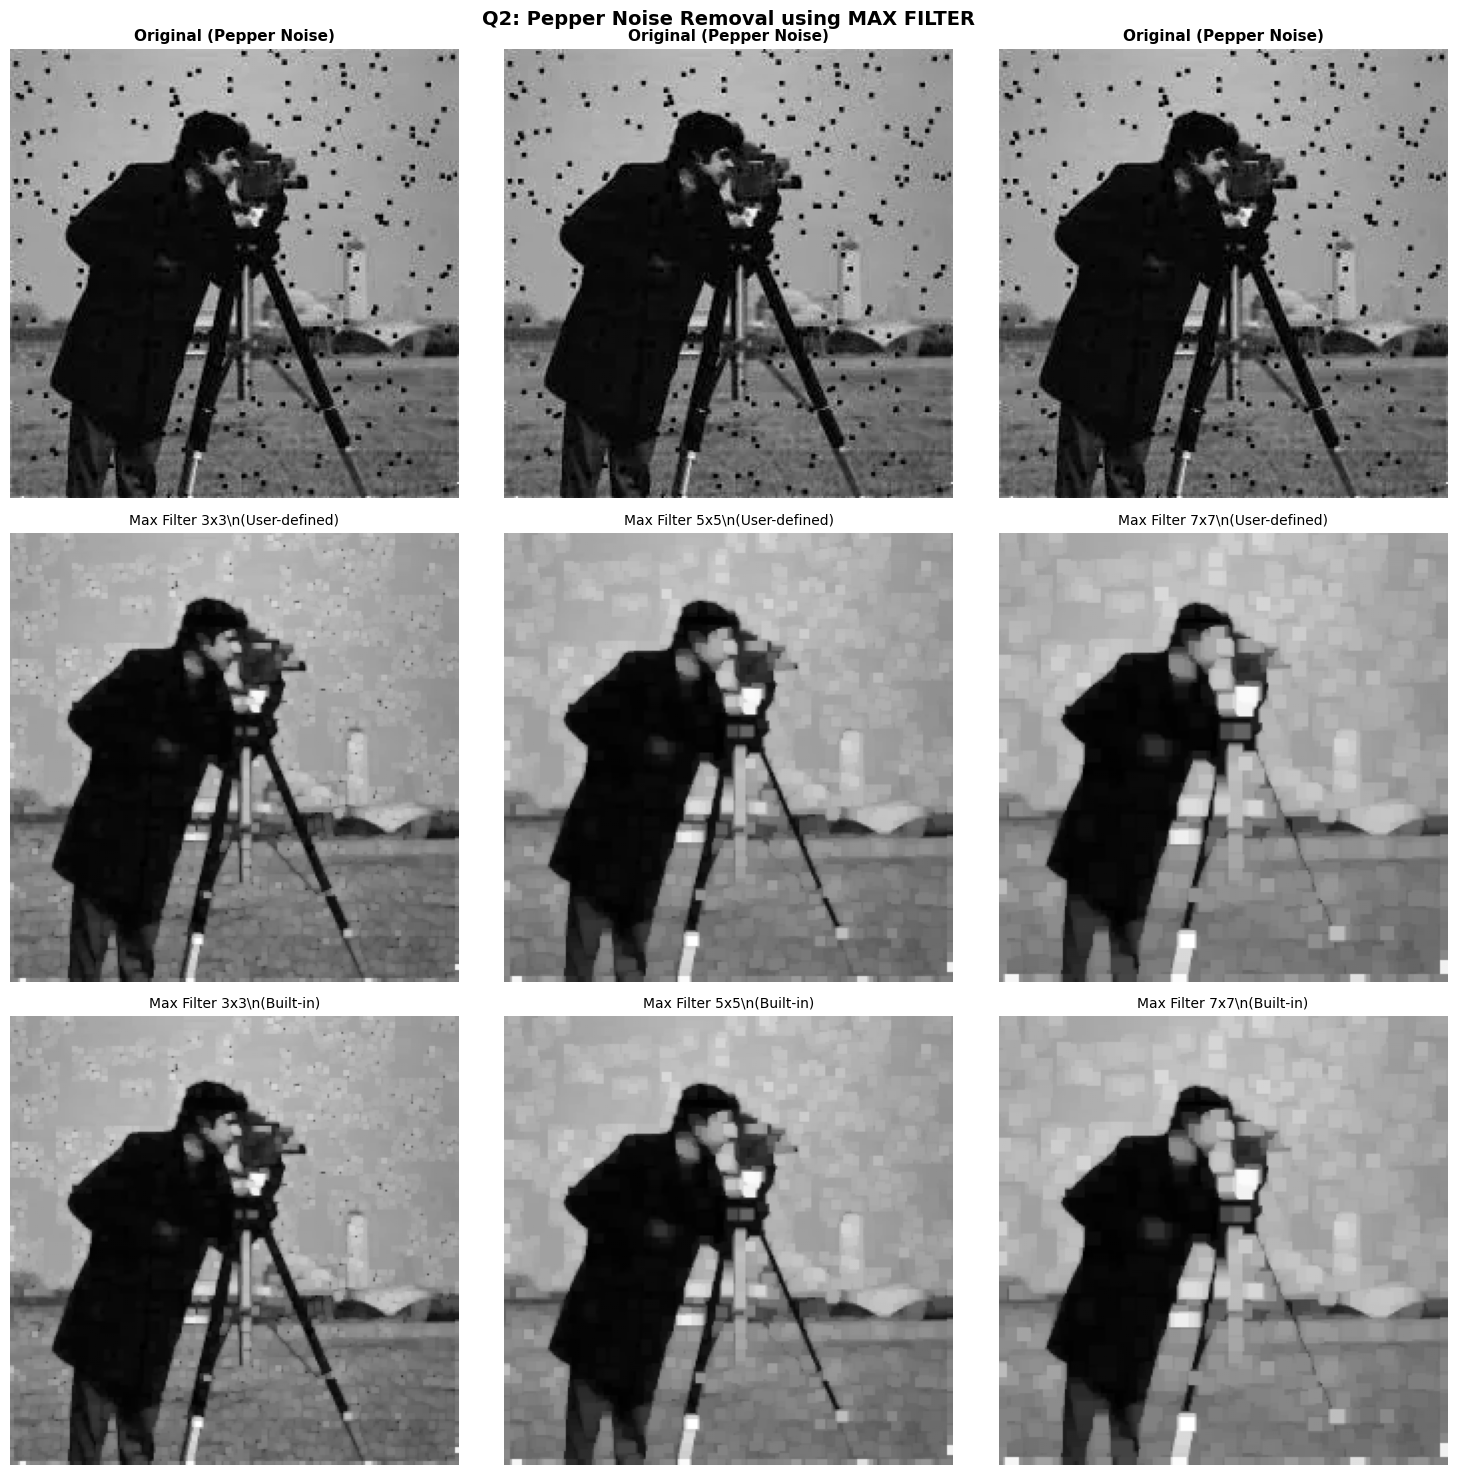

Max filter removes black pepper noise effectively!


In [37]:
if pepper_noise_img is not None:
    # Apply max filter with different kernel sizes (both manual and built-in)
    print("Applying Max Filter for Pepper Noise Removal...")
    
    # User-defined
    max3_manual = max_filter_manual(pepper_noise_img, 3)
    max5_manual = max_filter_manual(pepper_noise_img, 5)
    max7_manual = max_filter_manual(pepper_noise_img, 7)
    
    # Built-in
    max3_builtin = max_filter_builtin(pepper_noise_img, 3)
    max5_builtin = max_filter_builtin(pepper_noise_img, 5)
    max7_builtin = max_filter_builtin(pepper_noise_img, 7)
    
    # Display results
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i in range(3):
        axes[0, i].imshow(pepper_noise_img, cmap='gray')
        axes[0, i].set_title('Original (Pepper Noise)', fontsize=11, fontweight='bold')
        axes[0, i].axis('off')
    
    axes[1, 0].imshow(max3_manual, cmap='gray')
    axes[1, 0].set_title('Max Filter 3x3\\n(User-defined)', fontsize=10)
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(max5_manual, cmap='gray')
    axes[1, 1].set_title('Max Filter 5x5\\n(User-defined)', fontsize=10)
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(max7_manual, cmap='gray')
    axes[1, 2].set_title('Max Filter 7x7\\n(User-defined)', fontsize=10)
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(max3_builtin, cmap='gray')
    axes[2, 0].set_title('Max Filter 3x3\\n(Built-in)', fontsize=10)
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(max5_builtin, cmap='gray')
    axes[2, 1].set_title('Max Filter 5x5\\n(Built-in)', fontsize=10)
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(max7_builtin, cmap='gray')
    axes[2, 2].set_title('Max Filter 7x7\\n(Built-in)', fontsize=10)
    axes[2, 2].axis('off')
    
    plt.suptitle('Q2: Pepper Noise Removal using MAX FILTER', fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("Max filter removes black pepper noise effectively!")
else:
    print("Pepper noise image not found!")


### Q3: Remove Salt & Pepper Noise (Both White and Black Pixels)

**Best filter: MEDIAN FILTER**

**Why it's better than linear filters:**
- Salt & pepper noise has both bright (255) and dark (0) pixels
- Min filter would only remove salt (white) noise
- Max filter would only remove pepper (black) noise
- Median filter sorts neighborhood pixels and takes middle value
- This removes both extremes (0 and 255) effectively
- Median preserves edges better than mean filter


Applying Median Filter for Salt & Pepper Noise Removal...


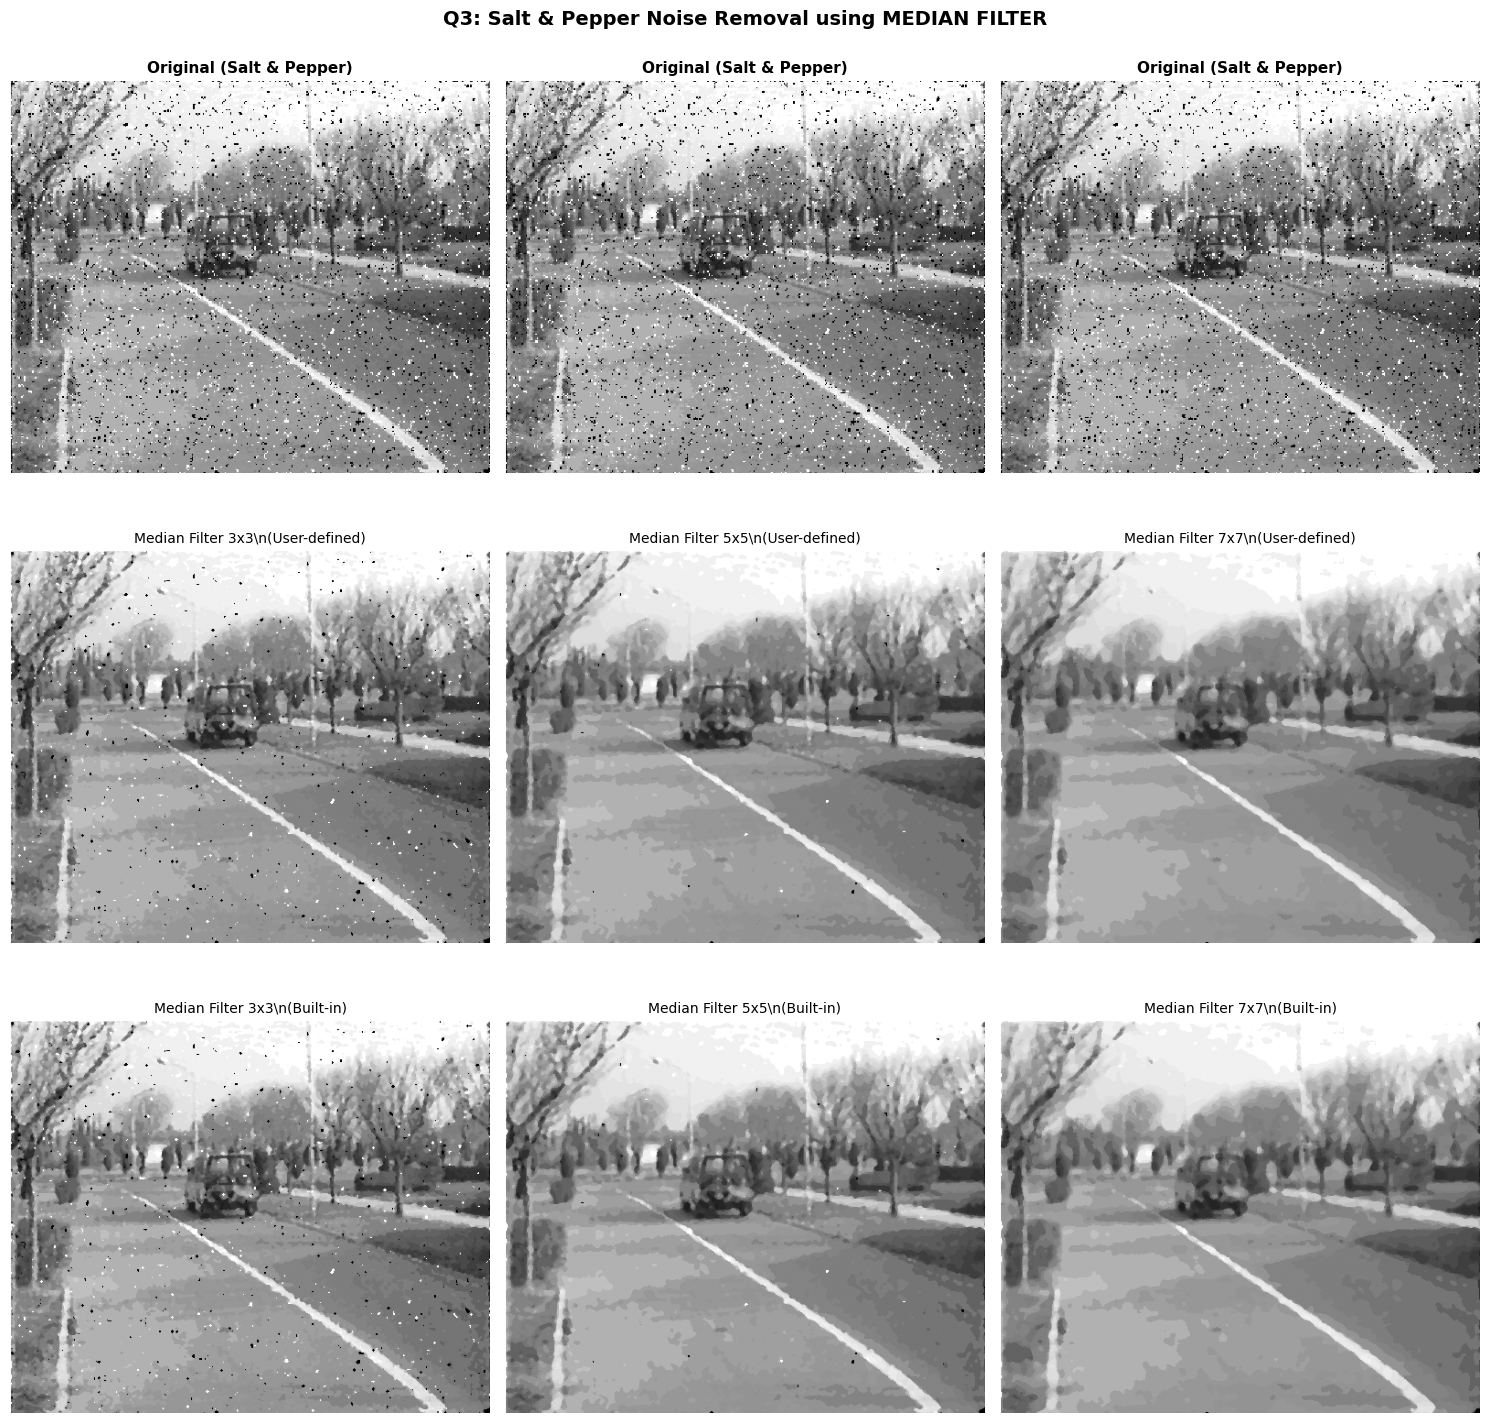

Median filter removes both salt and pepper noise effectively!


In [38]:
if salt_pepper_img is not None:
    # Apply median filter with different kernel sizes (both manual and built-in)
    print("Applying Median Filter for Salt & Pepper Noise Removal...")
    
    # User-defined
    median3_manual = median_filter_manual(salt_pepper_img, 3)
    median5_manual = median_filter_manual(salt_pepper_img, 5)
    median7_manual = median_filter_manual(salt_pepper_img, 7)
    
    # Built-in
    median3_builtin = median_filter_builtin(salt_pepper_img, 3)
    median5_builtin = median_filter_builtin(salt_pepper_img, 5)
    median7_builtin = median_filter_builtin(salt_pepper_img, 7)
    
    # Display results
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i in range(3):
        axes[0, i].imshow(salt_pepper_img, cmap='gray')
        axes[0, i].set_title('Original (Salt & Pepper)', fontsize=11, fontweight='bold')
        axes[0, i].axis('off')
    
    axes[1, 0].imshow(median3_manual, cmap='gray')
    axes[1, 0].set_title('Median Filter 3x3\\n(User-defined)', fontsize=10)
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(median5_manual, cmap='gray')
    axes[1, 1].set_title('Median Filter 5x5\\n(User-defined)', fontsize=10)
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(median7_manual, cmap='gray')
    axes[1, 2].set_title('Median Filter 7x7\\n(User-defined)', fontsize=10)
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(median3_builtin, cmap='gray')
    axes[2, 0].set_title('Median Filter 3x3\\n(Built-in)', fontsize=10)
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(median5_builtin, cmap='gray')
    axes[2, 1].set_title('Median Filter 5x5\\n(Built-in)', fontsize=10)
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(median7_builtin, cmap='gray')
    axes[2, 2].set_title('Median Filter 7x7\\n(Built-in)', fontsize=10)
    axes[2, 2].axis('off')
    
    plt.suptitle('Q3: Salt & Pepper Noise Removal using MEDIAN FILTER', fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("Median filter removes both salt and pepper noise effectively!")
else:
    print("Salt & pepper noise image not found!")


### Q4: Implement Midpoint Filter for Gaussian Noise

**Formula: Midpoint = (I_max + I_min) / 2**

**Why midpoint filter for Gaussian noise:**
- Gaussian noise adds random values from a normal distribution
- Unlike salt & pepper (which adds only extremes), Gaussian noise is spread across all intensity levels
- Midpoint filter averages the max and min in the neighborhood
- This works well for noise that's randomly distributed
- Best for uniformly distributed noise or noise that affects the entire intensity range


Creating image with Gaussian noise and applying Midpoint Filter...


/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_22338/328579739.py:64: RuntimeWarning: overflow encountered in scalar add
  output[i, j] = (np.max(region) + np.min(region)) // 2


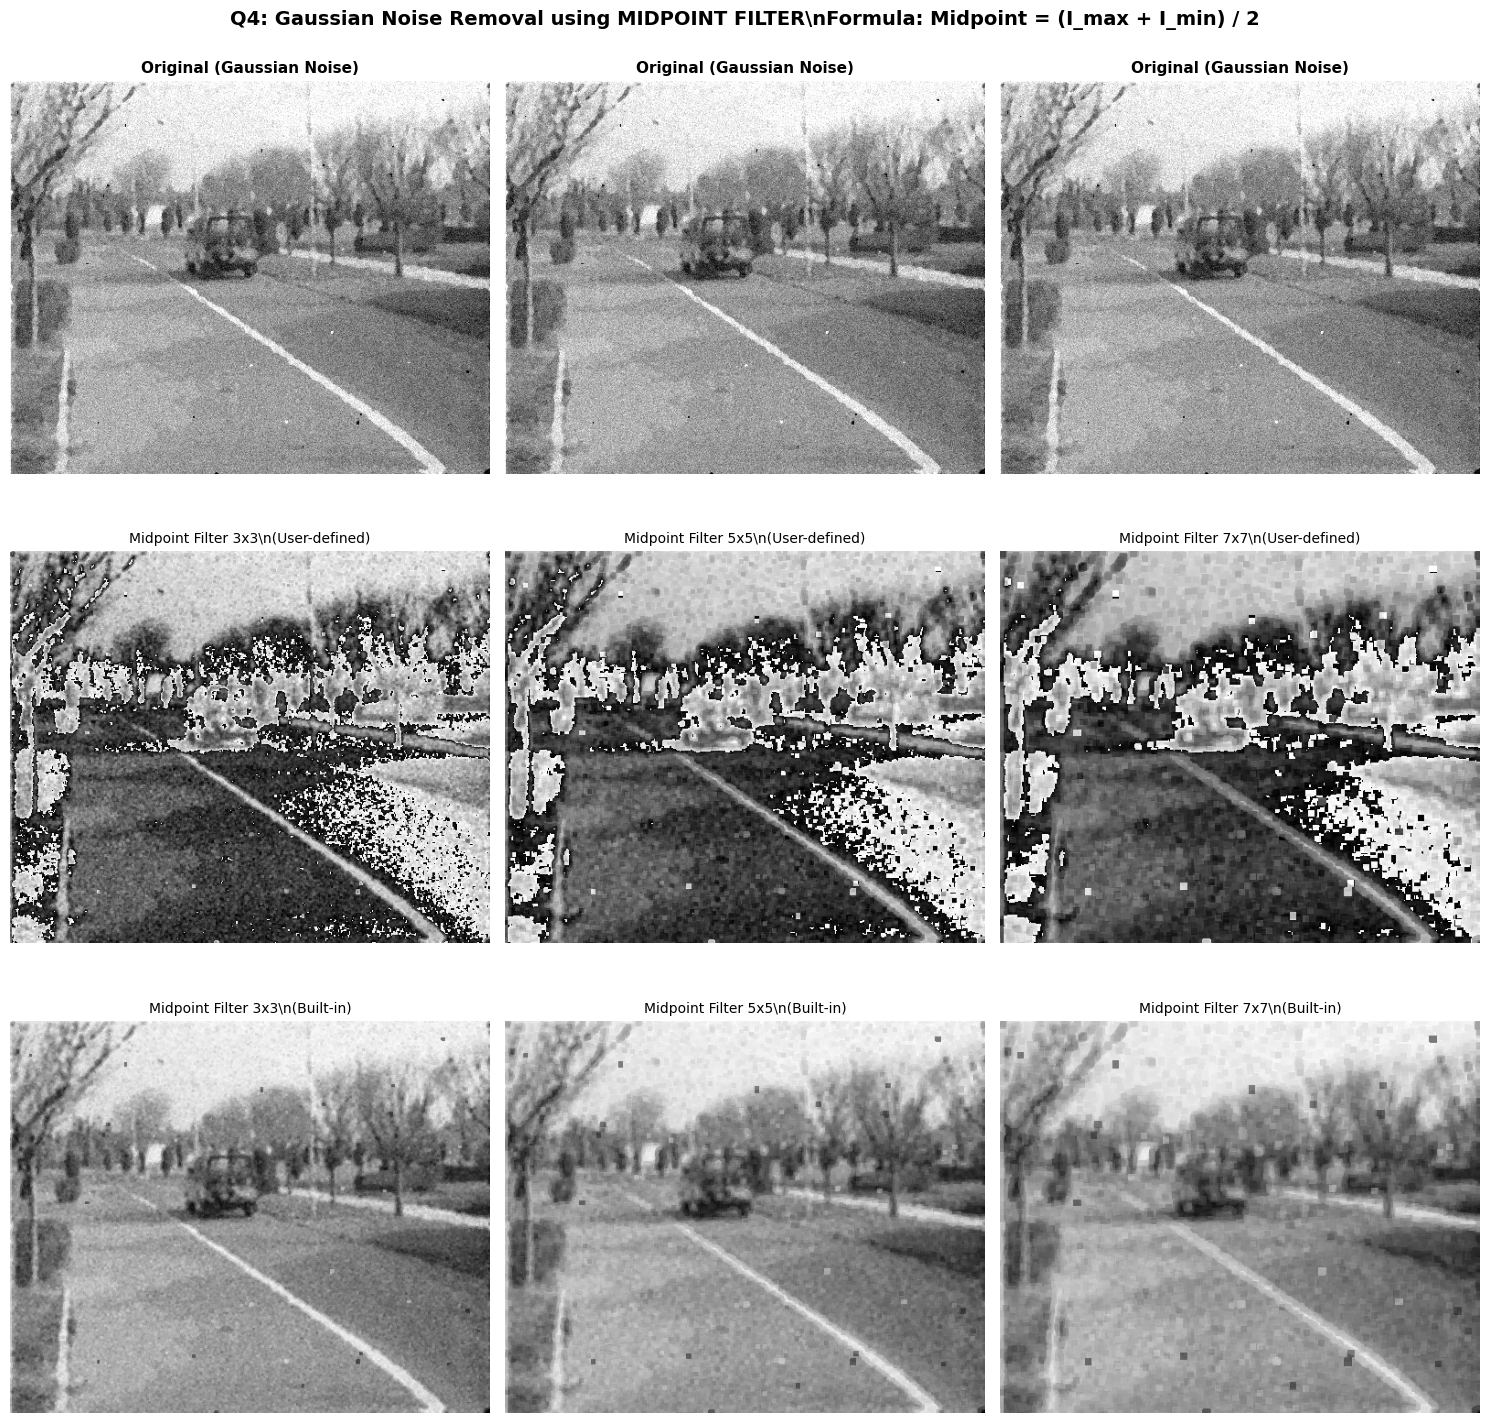

Midpoint filter handles Gaussian noise effectively!


In [39]:
if salt_pepper_img is not None:
    # Create Gaussian noise on a cleaned image
    print("Creating image with Gaussian noise and applying Midpoint Filter...")
    
    # First, clean the image using median filter to get a reference
    clean_img = median_filter_builtin(salt_pepper_img, 5)
    
    # Add Gaussian noise
    mean = 0
    sigma = 20
    gaussian_noise = np.random.normal(mean, sigma, clean_img.shape)
    gaussian_noisy_img = np.clip(clean_img.astype(np.float32) + gaussian_noise, 0, 255).astype(np.uint8)
    
    # User-defined
    midpoint3_manual = midpoint_filter_manual(gaussian_noisy_img, 3)
    midpoint5_manual = midpoint_filter_manual(gaussian_noisy_img, 5)
    midpoint7_manual = midpoint_filter_manual(gaussian_noisy_img, 7)
    
    # Built-in
    midpoint3_builtin = midpoint_filter_builtin(gaussian_noisy_img, 3)
    midpoint5_builtin = midpoint_filter_builtin(gaussian_noisy_img, 5)
    midpoint7_builtin = midpoint_filter_builtin(gaussian_noisy_img, 7)
    
    # Display results
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i in range(3):
        axes[0, i].imshow(gaussian_noisy_img, cmap='gray')
        axes[0, i].set_title('Original (Gaussian Noise)', fontsize=11, fontweight='bold')
        axes[0, i].axis('off')
    
    axes[1, 0].imshow(midpoint3_manual, cmap='gray')
    axes[1, 0].set_title('Midpoint Filter 3x3\\n(User-defined)', fontsize=10)
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(midpoint5_manual, cmap='gray')
    axes[1, 1].set_title('Midpoint Filter 5x5\\n(User-defined)', fontsize=10)
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(midpoint7_manual, cmap='gray')
    axes[1, 2].set_title('Midpoint Filter 7x7\\n(User-defined)', fontsize=10)
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(midpoint3_builtin, cmap='gray')
    axes[2, 0].set_title('Midpoint Filter 3x3\\n(Built-in)', fontsize=10)
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(midpoint5_builtin, cmap='gray')
    axes[2, 1].set_title('Midpoint Filter 5x5\\n(Built-in)', fontsize=10)
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(midpoint7_builtin, cmap='gray')
    axes[2, 2].set_title('Midpoint Filter 7x7\\n(Built-in)', fontsize=10)
    axes[2, 2].axis('off')
    
    plt.suptitle('Q4: Gaussian Noise Removal using MIDPOINT FILTER\\nFormula: Midpoint = (I_max + I_min) / 2', 
                 fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("Midpoint filter handles Gaussian noise effectively!")
else:
    print("Image not available for Gaussian noise demonstration!")


## Summary and Conclusions

### Program-1: Medical Imaging
- Implemented correlation and convolution operations with three different masks
- Demonstrated differences in template matching vs filtering applications
- Showed techniques to improve detection accuracy through preprocessing
- Analyzed when to use each method in medical imaging contexts

### Program-2: Traffic Surveillance
- Implemented non-linear spatial filters (Min, Max, Median, Midpoint)
- Demonstrated optimal filter selection for different noise types
- Compared user-defined vs built-in implementations
- Analyzed trade-offs between different kernel sizes

**Key Takeaways:**

| Noise Type | Best Filter | Reason |
|------------|-------------|--------|
| Salt (white pixels) | MIN FILTER | Removes bright outliers |
| Pepper (black pixels) | MAX FILTER | Removes dark outliers |
| Salt & Pepper (both) | MEDIAN FILTER | Removes both extremes |
| Gaussian (distributed) | MIDPOINT/MEAN | Handles distributed noise |

**Important Insights:**
1. **Linear vs Non-linear**: Non-linear filters preserve edges better for impulse noise
2. **Filter Selection**: Match filter to noise type for optimal results
3. **Kernel Size**: Larger kernels remove more noise but may blur important features (5x5 is often optimal)
4. **Application Context**: Medical imaging requires careful balance between noise removal and feature preservation
